# Measuring Effectiveness of TV Advertisement on Website Impressions
+ Method for calculating website traffic attributable to TV advertising
+ Metrics for measuring TV ad performance
+ Calculated metrics
+ Presentation

### Method
+ 1. Baseline website traffic expected at a given minute of the hour in a day
    + Group data into 7 days x 24 hours x 60 min buckets
    + For each bucket, estimate expected visitors on website traffic
    
+ 2. Immediate lift
    + Identify unique visitors who have typed in website *directly* within 5 minutes of a TV ad airing [Ref 1]
    + CPV = Cost of TV ad / Number of these unique visitors
    
+ 3. Drag lift
    + Identify unique visitors who have typed in website *directly* after a TV ad aired: 5 minutes to 30 days [Ref 2]
    + CPV = Cost of TV ad / Number of these unique visitors

+ 4. TV ad effectiveness
    +  CPV = Cost Per Unique Viewer
    
### Future Work
+ As there are multiple advertisements, the shortest interval between two ads was seen as 4 minutes.
    + So, the Immediate Lift window could be set as 4 minutes. 
+ Drag lift needs to be computed
+ Total lift = Immediate lift + Drag lift

    
### References:
  1. https://www.tatari.tv/insights/understanding-linear-tv-measurement at 0:52    
  2. https://www.tatari.tv/insights/understanding-linear-tv-measurement at 1:08

### Imports

In [1]:
from   datetime import datetime
from   datetime import timedelta
from   sklearn.linear_model import LinearRegression
from   sklearn.preprocessing import PolynomialFeatures
from   sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# Baseline website visitors

In [2]:
df_baseline = pd.read_csv("Data_Web_Traffic.csv")

In [3]:
for i in range(len(df_baseline)):
    df_baseline.loc[i, 'Timestamp'] = df_baseline.loc[i, 'time'][:-3] 
    df_baseline.loc[i, 'Timestamp'] = datetime.strptime(df_baseline.loc [i, 'Timestamp'], '%Y-%m-%d %H:%M:%S')
    df_baseline.loc[i, 'Day']       = df_baseline.loc[i, 'Timestamp'].weekday()
    df_baseline.loc[i, 'Hour']      = df_baseline.loc[i, 'Timestamp'].hour
    df_baseline.loc[i, 'Minute']    = df_baseline.loc[i, 'Timestamp'].minute

df_groups = df_baseline.groupby(["Day", "Hour", "Minute"]).agg({'value':['count', 'min', 'max', 'mean', 'std']})    
df_groups

value                                 
                count  min   max       mean        std
Day Hour Minute                                       
0.0 0.0  0.0        7  1.0  36.0  13.714286  12.776466
         1.0        8  1.0  28.0  10.750000   9.558093
         2.0        8  1.0  39.0   9.750000  12.578326
         3.0        6  1.0  31.0  12.000000  10.990905
         4.0        7  1.0  30.0  11.571429  10.341778
...               ...  ...   ...        ...        ...
6.0 23.0 55.0       7  1.0  29.0  12.142857  11.036735
         56.0       8  1.0  38.0  10.625000  12.546343
         57.0       6  1.0  33.0  14.833333  11.805366
         58.0       7  1.0  31.0  14.142857  12.005951
         59.0       7  2.0  35.0  14.142857  12.759684

[10080 rows x 5 columns]

### Creating a polynomial fit for baseline numbers

In [4]:
x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 2)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE2           = round((np.abs(y.values - y_pred)).mean(), 1)
print(2, PolyMAE2)



x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 3)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE3           = round((np.abs(y.values - y_pred)).mean(), 1)
print(3, PolyMAE3)


x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 4)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE4           = round((np.abs(y.values - y_pred)).mean(), 1)
print(4, PolyMAE4)



x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 5)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE5           = round((np.abs(y.values - y_pred)).mean(), 1)
print(5, PolyMAE5)


x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 6)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE6           = round((np.abs(y.values - y_pred)).mean(), 1)
print(6, PolyMAE6)



x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 7)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE7           = round((np.abs(y.values - y_pred)).mean(), 1)
print(7, PolyMAE7)



x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 8)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE8           = round((np.abs(y.values - y_pred)).mean(), 1)
print(8, PolyMAE8)

2 6.9
3 6.6
4 6.6
5 6.4
6 6.4
7 6.4
8 6.5


### Overfitting v. Underfitting
+ Least (MAE) = 6.4
+ Smallest even order polynomial with this MAE = 6
+ Now, for any given 'Day', 'Hour', and 'Minute' --> y_pred can tell the expected value 
+ Any value above y_pred + MAE6 --> Attributable to TV ad 

  Degree  MAE
0      2  6.9
1      3  6.6
2      4  6.6
3      5  6.4
4      6  6.4
5      7  6.4
6      8  6.5
6 6.4


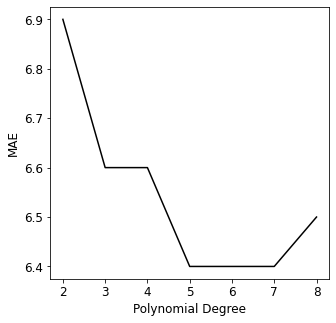

In [5]:
df_avg_view_fit = pd.DataFrame(columns = ['Degree', 'MAE'])
df_avg_view_fit.loc[0, 'Degree'] = 2
df_avg_view_fit.loc[0, 'MAE'   ] = PolyMAE2
df_avg_view_fit.loc[1, 'Degree'] = 3
df_avg_view_fit.loc[1, 'MAE'   ] = PolyMAE3
df_avg_view_fit.loc[2, 'Degree'] = 4
df_avg_view_fit.loc[2, 'MAE'   ] = PolyMAE4
df_avg_view_fit.loc[3, 'Degree'] = 5
df_avg_view_fit.loc[3, 'MAE'   ] = PolyMAE5
df_avg_view_fit.loc[4, 'Degree'] = 6
df_avg_view_fit.loc[4, 'MAE'   ] = PolyMAE6
df_avg_view_fit.loc[5, 'Degree'] = 7
df_avg_view_fit.loc[5, 'MAE'   ] = PolyMAE7
df_avg_view_fit.loc[6, 'Degree'] = 8
df_avg_view_fit.loc[6, 'MAE'   ] = PolyMAE8

print(df_avg_view_fit)
plt.figure(figsize = (5,5))
plt.plot(df_avg_view_fit['Degree'], df_avg_view_fit['MAE'], color = 'k')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel("Polynomial Degree", fontsize = 12)
plt.ylabel("MAE", fontsize = 12)

x                  = df_baseline[['Day', 'Hour', 'Minute']]
y                  = df_baseline[['value']]

poly_reg_transform = PolynomialFeatures (degree = 6)
x_poly             = poly_reg_transform.fit_transform(x)
poly               = LinearRegression()
poly.fit(x_poly, y)

# Backtest
y_pred             = poly.predict(x_poly)
PolyMAE6           = round((np.abs(y.values - y_pred)).mean(), 1)
print(6, PolyMAE6)

### Setting baseline values

In [6]:
df_baseline['value baseline'] = y_pred

### Identifying website traffic spike due to 'direct' visits
+ If baseline value            < value spike --> TV ad attribution confidence:  25%
+ If baseline value +  50% MAE < value spike --> TV ad attribution confidence:  50%
+ If baseline value +  75% MAE < value spike --> TV ad attribution confidence:  75%
+ If baseline value + 100% MAE < value spike --> TV ad attribution confidence: 100%

In [7]:
df_direct = df_baseline[df_baseline['traffic_source'] == "direct"] # [['Timestamp', 'traffic_source', 'value']]
df_direct.loc[: , 'Value spike'] = df_direct.loc[: , 'value'] - df_direct.loc[: , 'value baseline']

/Users/semant/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/semant/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### Identifying 4 attribution regimes

In [8]:
Conf0 = df_direct[              0 <= df_direct['Value spike']].index
Conf1 = df_direct[0.50 * PolyMAE6 <= df_direct['Value spike']].index
Conf2 = df_direct[0.75 * PolyMAE6 <= df_direct['Value spike']].index
Conf3 = df_direct[1.00 * PolyMAE6 <= df_direct['Value spike']].index

print(len(Conf1), len(Conf2), len(Conf3))

df_direct['Confidence'] = 0.0

for i in Conf0:
    df_direct.loc[i, 'Confidence'] = 0.25

for i in Conf1:
    df_direct.loc[i, 'Confidence'] = 0.50

for i in Conf2:
    df_direct.loc[i, 'Confidence'] = 0.75    
    
for i in Conf3:
    df_direct.loc[i, 'Confidence'] = 1.00

<ipython-input-8-287a7a5431b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direct['Confidence'] = 0.0
/Users/semant/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


14043 10834 8402


In [9]:
df_direct[0 < df_direct['Confidence']]

,time,traffic_source,value,Timestamp,Day,Hour,Minute,value baseline,Value spike,Confidence
1024,2017-10-17 16:03:00+00,direct,12.0,2017-10-17 16:03:00,1.0,16.0,3.0,10.006175,1.993825,0.25
1025,2017-10-17 16:04:00+00,direct,13.0,2017-10-17 16:04:00,1.0,16.0,4.0,10.073993,2.926007,0.25
1026,2017-10-17 16:05:00+00,direct,11.0,2017-10-17 16:05:00,1.0,16.0,5.0,10.177738,0.822262,0.25
1031,2017-10-17 16:10:00+00,direct,12.0,2017-10-17 16:10:00,1.0,16.0,10.0,10.840887,1.159113,0.25
1966,2017-10-26 07:17:00+00,direct,4.0,2017-10-26 07:17:00,3.0,7.0,17.0,2.241254,1.758746,0.25
...,...,...,...,...,...,...,...,...,...,...
63946,2017-11-13 05:41:00+00,direct,13.0,2017-11-13 05:41:00,0.0,5.0,41.0,7.500721,5.499279,0.75
63947,2017-11-13 05:42:00+00,direct,16.0,2017-11-13 05:42:00,0.0,5.0,42.0,7.569782,8.430218,1.00
63948,2017-11-13 06:00:00+00,direct,8.0,2017-11-13 06:00:00,0.0,6.0,0.0,7.165552,0.834448,0.25
63949,2017-11-13 06:01:00+00,direct,37.0,2017-11-13 06:01:00,0.0,6.0,1.0,6.954295,30.045705,1.00


# Checking when ads were run

In [10]:
df_ads = pd.read_csv("Data_ad.csv")

for i in range(len(df_ads)):
    df_ads.loc[i, 'Timestamp'] = df_ads.loc[i, 'time'][:-6] 
    df_ads.loc[i, 'Timestamp'] = datetime.strptime(df_ads.loc [i, 'Timestamp'], '%Y-%m-%d %H:%M:%S')
    df_ads.loc[i, 'Day']       = df_ads.loc[i, 'Timestamp'].weekday()
    df_ads.loc[i, 'Hour']      = df_ads.loc[i, 'Timestamp'].hour
    df_ads.loc[i, 'Minute']    = df_ads.loc[i, 'Timestamp'].minute

# df_ads_groups = df_ads.groupby(["Day", "Hour", "Minute"]).agg({'spend'   :['count', 'min', 'max', 'mean', 'std'],
#                                                                'duration':['count', 'min', 'max', 'mean', 'std']})    
# df_ads_groups

spend                                duration              \
                count      min      max     mean std    count   min   max   
Day Hour Minute                                                             
0.0 1.0  0.0        1   35.190   35.190   35.190 NaN        1  29.0  29.0   
         17.0       1   22.950   22.950   22.950 NaN        0   NaN   NaN   
         44.0       1   53.550   53.550   53.550 NaN        1  14.0  14.0   
    2.0  16.0       1  107.100  107.100  107.100 NaN        1  27.0  27.0   
         32.0       1  107.100  107.100  107.100 NaN        1  29.0  29.0   
...               ...      ...      ...      ...  ..      ...   ...   ...   
6.0 23.0 32.0       1  487.900  487.900  487.900 NaN        1  29.0  29.0   
         39.0       1   80.155   80.155   80.155 NaN        1  14.0  14.0   
         45.0       1   61.200   61.200   61.200 NaN        1  14.0  14.0   
         47.0       1   61.200   61.200   61.200 NaN        1  29.0  29.0   
         53.0       1  243.950  243.950  243.950 NaN        1  14.0  14.0   

                           
                 mean std  
Day Hour Minute            
0.0 1.0  0.0     29.0 NaN  
         17.0     NaN NaN  
         44.0    14.0 NaN  
    2.0  16.0    27.0 NaN  
         32.0    29.0 NaN  
...               ...  ..  
6.0 23.0 32.0    29.0 NaN  
         39.0    14.0 NaN  
         45.0    14.0 NaN  
         47.0    29.0 NaN  
         53.0    14.0 NaN  

[1329 rows x 10 columns]

In [11]:
type(df_ads.loc[0, 'Timestamp']) # + (5*60)

datetime.datetime

In [17]:
df_ads['Immediate Lift'] = 0.0

for i in range(len(df_ads)):
    t1 = df_ads.loc[i, 'Timestamp']
    t2 = t1 + timedelta(minutes = 5)
    
    q_idx = df_direct[(t1 < df_direct['Timestamp']) & (df_direct['Timestamp'] < t2)].index
    if 0 < len(q_idx):
        for j in q_idx:
            df_ads.loc[i, 'Immediate Lift'] += df_direct.loc[j, 'Value spike'] * df_direct.loc[j, 'Confidence']

df_ads[['Timestamp', 'Immediate Lift']]            

,Timestamp,Immediate Lift
0,2017-10-16 05:25:32,0.000000
1,2017-10-16 08:25:32,1.361584
2,2017-10-16 05:56:36,0.000000
3,2017-10-16 08:56:36,4.193217
4,2017-10-16 07:38:41,0.000000
...,...,...
1451,2017-11-12 13:42:17,42.952575
1452,2017-11-12 20:23:42,98.486326
1453,2017-11-12 23:23:42,84.862007
1454,2017-11-13 01:17:12,70.460522


[]

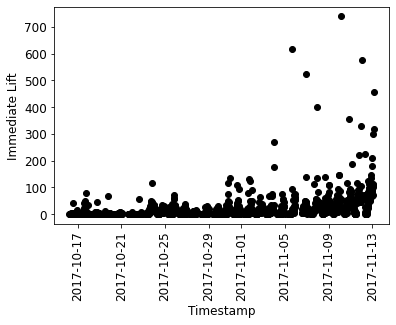

In [28]:
plt.xticks(fontsize = 12, rotation = 90)
plt.yticks(fontsize = 12)
plt.xlabel('Timestamp', fontsize = 12)
plt.ylabel('Immediate Lift', fontsize = 12)
plt.scatter(df_ads['Timestamp'], df_ads['Immediate Lift'], color = 'k')
plt.plot()

In [29]:
df_ads['Immediate Lift'].describe()

count    1456.000000
mean       23.033809
std        48.265231
min         0.000000
25%         0.918092
50%         8.276762
75%        27.707214
max       738.419639
Name: Immediate Lift, dtype: float64

In [34]:
df_ads.loc[:, 'Ad effectivness'] = df_ads.loc[:, 'Immediate Lift'] / df_ads.loc[:, 'spend']
df_ads['Ad effectivness'].describe()

count    1456.000000
mean        0.712964
std         1.760972
min         0.000000
25%         0.022119
50%         0.132523
75%         0.590848
max        25.970782
Name: Ad effectivness, dtype: float64

In [33]:
df_ads_effectiveness = df_ads.groupby('creative_id').agg({'spend'          :['sum'],
                                                          'Immediate Lift' :['sum'],
                                                          'Ad effectivness':['sum']})    
df_ads_effectiveness

,spend,Immediate Lift,Ad effectivness
,sum,sum,sum
creative_id,,,
5992d996de2f11faa3492960a58de350,11099.30,928.618083,76.636161
6570d4e06efb97840eec4d9d46cde0bb,12630.15,2595.502451,70.310927
6e69270e444e10a1ec9a2bdfbb739c05,30706.25,7154.863045,97.912832
a45caf06263a742e1b7bff7b3bb10ddf,9520.85,1460.257697,58.376798
b6cc05016845138a72f2fa2e4f1f1a56,10897.85,816.504506,65.324980
efc5636dd257db2a6cf7cff2569f7d59,8749.90,1705.202013,75.451582
eff6a8d032a8ca3ae098381569a9c15f,11391.70,1051.680797,74.076209
f3483f810d44cef79d90a66ab2da1bf0,70555.10,17824.596883,519.985710
